In [6]:
import pandas as pd
df=pd.read_csv("train.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [8]:
X=df.drop(['Loan_Status','Loan_ID'], axis=1)
y=df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
9      N
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     N
18     N
19     Y
20     N
21     Y
22     N
23     N
24     N
25     Y
26     Y
27     Y
28     N
29     Y
      ..
470    Y
471    N
472    Y
473    Y
474    Y
475    Y
476    Y
477    N
478    Y
479    N
480    Y
481    Y
482    Y
483    Y
484    Y
485    Y
486    N
487    N
488    Y
489    N
490    Y
491    Y
492    Y
493    Y
494    N
495    Y
496    Y
497    Y
498    Y
499    N
Name: Loan_Status, Length: 500, dtype: object

In [9]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y=lb.fit_transform(y)
y

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [10]:
X.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [11]:
X['Gender'].value_counts()

Male      400
Female     91
Name: Gender, dtype: int64

In [12]:
X['Gender'].fillna("Male", inplace=True)

In [13]:
X.isnull().sum()

Gender                0
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [14]:
X['Married'].value_counts()

Yes    322
No     175
Name: Married, dtype: int64

In [15]:
X['Married'].fillna("Yes", inplace=True)
X.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [16]:
X['Dependents'].value_counts()

0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64

In [17]:
X['Dependents'].fillna(0,inplace=True)

In [18]:
X['Self_Employed'].value_counts()

No     407
Yes     66
Name: Self_Employed, dtype: int64

In [19]:
X['Self_Employed'].fillna('No',inplace=True)

In [20]:
mean_loan=X['LoanAmount'].mean()
X['LoanAmount'].fillna(mean_loan,inplace=True)
X.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [21]:
X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mean(),inplace=True)
X['Credit_History'].fillna(X['Credit_History'].mean(),inplace=True)
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [22]:
X=pd.get_dummies(X)
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

C:\Users\Sonu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)


C:\Users\Sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sonu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
n_b.fit(X_train, y_train)

C:\Users\Sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)

C:\Users\Sonu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
print(lr.score(X_test, y_test))
print(dtf.score(X_test, y_test))
print(n_b.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(svc.score(X_test, y_test))

0.84
0.7733333333333333
0.84
0.64
0.72


In [ ]:
gender=input("What is your gender (Male or Female):")
married=input("Married (Enter Yes or No):")
dependents=int(input("dependents value (Enter 0 or 1 or 2 or 3+):"))
Education=input("enter your education (Enter Graduate or Not Graduate)")
SelfEmployed=input("Self Employed (Enter Yes or No):")
Applicantincome=int(input("enter applicant income (Enter between 150 to 81000)"))
coapplicantincome=int(input("enter co applicant income(Enter ):"))
loanamount=int(input("enter loan amount:"))
loanamountterm=int(input("enter loan amount term:"))
credithistory=int(input("enter credit history:"))
propertyarea=input("enter property area:")

data = [[gender,married,dependents,Education,SelfEmployed,Applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea]]

In [ ]:
newdf = pd.DataFrame(data, columns = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'])

In [ ]:
newdf = pd.get_dummies(newdf)

In [ ]:
missing_cols = set( X_train.columns ) - set( newdf.columns )

In [ ]:
for c in missing_cols:
    newdf[c] = 0

In [ ]:
newdf = newdf[X_train.columns]

In [ ]:
yp=n_b.predict(newdf)
print(yp)

In [ ]:
if (yp[0]=='Y'):
    print("Your Loan is approved, Please contact at HDFC Bank Any Branch for further processing")
else:
    print("Sorry ! Your Loan is not approved")

In [ ]:
yp1=n_b.predict(newdf)
yp2=lr.predict(newdf)
yp3=dtf.predict(newdf)
yp4=knn.predict(newdf)
yp5=svc.predict(newdf)
print(yp1)

print(yp2)
print(yp3)
print(yp4)
print(yp5)

In [31]:
from sklearn.metrics import confusion_matrix 
y_predict=lr.predict(X_test)
results = confusion_matrix(y_test, y_predict) 
print('Confusion Matrix :')
print(results)
for i in range(5):
    print(y_predict[i],y_test.iloc[i])


Confusion Matrix :
[[ 21  21]
 [  3 105]]


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
for i in range(5):
    print(y_predict[i],"     ", y_test.iloc[i])

In [ ]:
print(lr.predict_proba(X_test[0:5]))

In [ ]:
# save the model to disk
import pickle
filename = 'alok_model.sav'
tuples=(lr,X)
pickle.dump(tuples, open(filename, 'wb'))

In [33]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,lr.predict_proba(X_test)[:,1])

In [34]:
fpr

array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.07142857, 0.07142857, 0.0952381 ,
       0.0952381 , 0.11904762, 0.11904762, 0.14285714, 0.14285714,
       0.19047619, 0.19047619, 0.26190476, 0.26190476, 0.28571429,
       0.28571429, 0.30952381, 0.30952381, 0.35714286, 0.35714286,
       0.42857143, 0.42857143, 0.47619048, 0.47619048, 0.5       ,
       0.5       , 0.69047619, 0.69047619, 0.88095238, 0.88095238,
       1.        ])

In [35]:
tpr

array([0.        , 0.00925926, 0.02777778, 0.02777778, 0.37962963,
       0.37962963, 0.42592593, 0.42592593, 0.48148148, 0.48148148,
       0.49074074, 0.49074074, 0.53703704, 0.53703704, 0.5462963 ,
       0.5462963 , 0.57407407, 0.57407407, 0.75925926, 0.75925926,
       0.7962963 , 0.7962963 , 0.87962963, 0.87962963, 0.88888889,
       0.88888889, 0.89814815, 0.89814815, 0.92592593, 0.92592593,
       0.98148148, 0.98148148, 0.99074074, 0.99074074, 1.        ,
       1.        ])

In [36]:
threshold

array([1.97378271, 0.97378271, 0.95976883, 0.95957642, 0.81864694,
       0.81243555, 0.79097733, 0.78609242, 0.77855027, 0.77802681,
       0.77575974, 0.77424884, 0.76873894, 0.76804815, 0.76380911,
       0.76250566, 0.76195942, 0.75697969, 0.70295465, 0.69947491,
       0.68790405, 0.68475512, 0.65867141, 0.65734712, 0.64366457,
       0.63435601, 0.62585852, 0.5932964 , 0.57067698, 0.57045058,
       0.46679939, 0.23903602, 0.21858609, 0.12630221, 0.11721806,
       0.04738461])

In [37]:
roc_auc=roc_auc_score(y_test,lr.predict(X_test))

In [38]:
roc_auc

0.7361111111111112

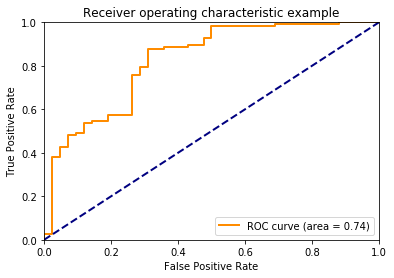

In [40]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

label = lb.fit_transform()